# PCovC with the Iris Dataset

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV, SGDClassifier
from sklearn.inspection import DecisionBoundaryDisplay

import sys
sys.path.append('../../')
from src.skmatter.decomposition.pcovc_new import PCovC

plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['scatter.edgecolors'] = "k"

random_state = 0
n_components = 2

## Load the Iris Dataset

In [2]:
iris = datasets.load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

## Scale Feature Data
#### Below, we transform the Iris feature data to have a mean of zero and standard deviation of one, while preserving relative relationships between feature values.

In [3]:
X, y = iris.data, iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## PCA
#### We use Principal Component Analysis to reduce the Iris feature data to two features that retain as much information as possible about the original dataset.

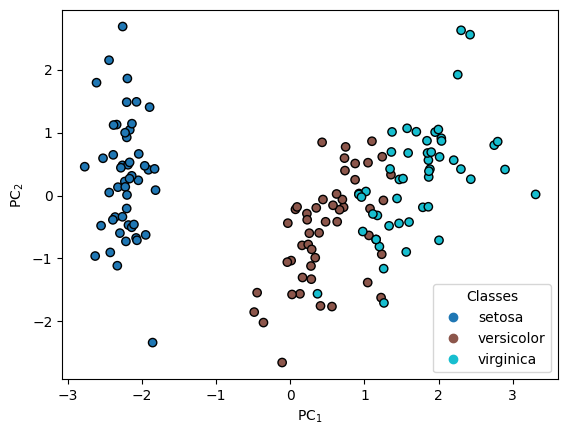

In [4]:
pca = PCA(
    n_components=n_components
)

pca.fit(X_scaled, y)
T_pca = pca.transform(X_scaled)

fig, axis = plt.subplots()
scatter = axis.scatter(T_pca[:, 0], T_pca[:, 1], c=y)
axis.set(xlabel="PC$_1$", ylabel="PC$_2$")
axis.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

## Effect of Mixing Parameter $\alpha$ on PCovC Map
#### Below, we see how different $\alpha$ values for our PCovC model result in varying class distinctions between setosa, versicolor, and virginica on the PCovC map.

Z: [[ 15.17581049   7.95942598 -23.13523647]
 [ 13.18091314   7.99151153 -21.17242466]
 [ 14.88555134   7.56205047 -22.4476018 ]
 [ 14.14223415   7.2298878  -21.37212195]]
W: [[-1.95545929  1.55986398  0.39559531]
 [ 2.14492589 -0.35630069 -1.7886252 ]
 [-4.27975939 -1.98088253  6.26064191]
 [-4.05341762 -1.64611994  5.69953755]]
Z: [[ 15.17581049   7.95942598 -23.13523647]
 [ 13.18091314   7.99151153 -21.17242466]
 [ 14.88555134   7.56205047 -22.4476018 ]
 [ 14.14223415   7.2298878  -21.37212195]]
W: [[-1.95545929  1.55986398  0.39559531]
 [ 2.14492589 -0.35630069 -1.7886252 ]
 [-4.27975939 -1.98088253  6.26064191]
 [-4.05341762 -1.64611994  5.69953755]]
Z: [[ 15.17581049   7.95942598 -23.13523647]
 [ 13.18091314   7.99151153 -21.17242466]
 [ 14.88555134   7.56205047 -22.4476018 ]
 [ 14.14223415   7.2298878  -21.37212195]]
W: [[-1.95545929  1.55986398  0.39559531]
 [ 2.14492589 -0.35630069 -1.7886252 ]
 [-4.27975939 -1.98088253  6.26064191]
 [-4.05341762 -1.64611994  5.69953755]]
Z: [

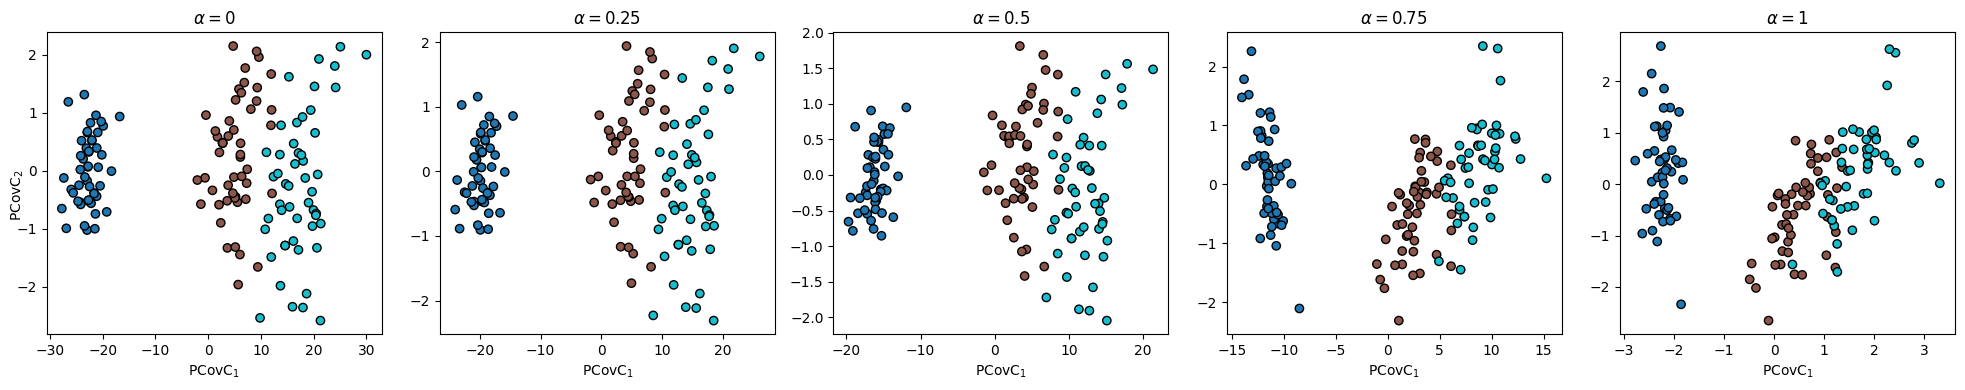

In [5]:
n_mixing = 5
mixing_params = [0, 0.25, 0.50, 0.75, 1]

fig, axes = plt.subplots(1, n_mixing, figsize=(4*n_mixing, 4))

for id, graph in enumerate(axes.flat):
    mixing = mixing_params[id]

    pcovc = PCovC(
        mixing=mixing, 
        n_components=n_components, 
        random_state=random_state, 
        classifier=LogisticRegressionCV()
    )
    
    pcovc.fit(X_scaled, y) 
    T = pcovc.transform(X_scaled)
    
    graph.set_title(r"$\alpha=$" + str(mixing))
    graph.set_xlabel("PCovC$_1$")
    graph.scatter(T[:, 0], T[:, 1], c=y)
    
fig.supylabel("PCovC$_2$", fontsize=10)

fig.tight_layout()

## Effect of PCovC Classifier on PCovC Map and Decision Boundaries
#### Here, we see how a PCovC model ($\alpha=$ 0.5) fitted with different classifiers produces varying PCovC maps. In addition, we see the varying decision boundaries produced by the respective PCovC classifiers overlayed onto the PCovC maps.

Z: [[ 1.66597297 -0.85674345 -6.62898283]
 [ 1.2372407  -0.32303016 -6.20640117]
 [ 1.50184495 -0.56903972 -6.37787205]
 [ 1.34645053 -0.37900204 -6.07352466]]
W: [[-0.15517623 -0.02428853 -0.28613279]
 [ 0.40516383 -0.45858794 -0.30690392]
 [-0.7119375   0.71721428  1.7508622 ]
 [-0.69766205 -0.69513986  1.6321471 ]]
Z: [[ 15.17581049   7.95942598 -23.13523647]
 [ 13.18091314   7.99151153 -21.17242466]
 [ 14.88555134   7.56205047 -22.4476018 ]
 [ 14.14223415   7.2298878  -21.37212195]]
W: [[-1.95545929  1.55986398  0.39559531]
 [ 2.14492589 -0.35630069 -1.7886252 ]
 [-4.27975939 -1.98088253  6.26064191]
 [-4.05341762 -1.64611994  5.69953755]]
Z: [[ 0.94994685 -0.74530979 -1.20463706]
 [ 0.67042693 -0.27831878 -1.39210814]
 [ 0.79833345 -0.50405087 -1.29428258]
 [ 0.66111503 -0.34492108 -1.31619395]]
W: [[ 0.0653816   0.01615964 -0.08154124]
 [ 0.22908717 -0.40913439  0.18004722]
 [-0.67350994  0.58857701  0.08493293]
 [-0.15665539 -0.6144802   0.77113559]]
Z: [[  30.77020069   -6.0385

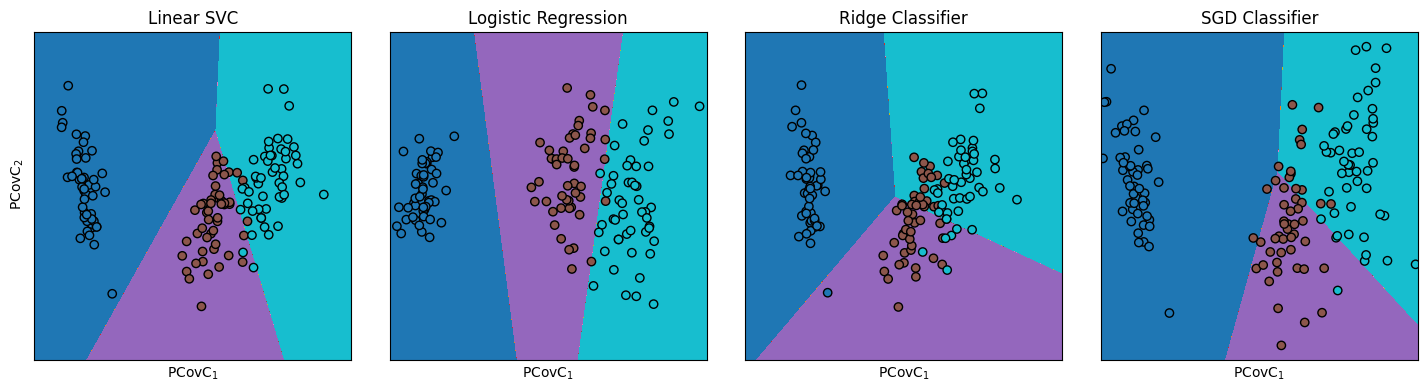

In [ ]:
mixing = 0.5
n_models = 4
fig, axes = plt.subplots(1, n_models, figsize=(4*n_models, 4))

models = {
    LinearSVC(
         random_state=random_state
    ): "Linear SVC",

    LogisticRegressionCV(
         random_state=random_state
    ): "Logistic Regression",

    RidgeClassifierCV(): "Ridge Classifier",

    SGDClassifier(
         random_state=random_state
    ): "SGD Classifier"  
}

for id, graph in enumerate(axes.flat):
     model = list(models)[id]
    
     pcovc = PCovC(
        mixing=mixing, 
        n_components=n_components, 
        random_state=random_state, 
        classifier=model
     )

     pcovc.fit(X_scaled, y)
     T = pcovc.transform(X_scaled)

     graph = axes.flat[id]
     graph.set_title(models[model])

     DecisionBoundaryDisplay.from_estimator(
          estimator=pcovc.classifier_, 
          X=T, 
          ax=graph, 
          response_method="predict", 
          grid_resolution=2000,
     )

     graph.set_xlabel("PCovC$_1$")
     graph.scatter(T[:, 0], T[:, 1], c=y)

     graph.set_xticks([])
     graph.set_yticks([])

     
fig.supylabel("PCovC$_2$", fontsize=10)
fig.subplots_adjust(wspace=0.12, left=0.035, bottom=0.06)